# PokéMetrics: Predicting Pokémon Stats

## Introduction to Problem & Data

### Problem statement:


The Pokemon franchise has captured the imagination of millions worldwide, with its games becoming a cornerstone of strategy-based entertainment. For this project, I aim to develop a predictive model that analyzes Pokémon attributes to determine their overall strength and efficiency in battles. By leveraging the Pokémon dataset, which includes comprehensive stats like HP, Attack, Defense, and Speed, this analysis seeks to uncover trends and patterns that can inform team-building strategies, type effectiveness, and gameplay decisions.

Understanding the attributes that contribute most to a Pokémon's strength, represented by its total stats, will not only provide insights for players but also serve as a fun and engaging introduction to predictive modeling and machine learning concepts.

### Dataset Description:

The dataset, compiled by Myles O’Neill (from Kaggle), contains information about 721 Pokemon from the core Pokemon games. It includes features such as Pokemon type(s), individual stats (HP, Attack, Defense, etc.), and a calculated "Total" score, which serves as a general indicator of each Pokemon's strength.

I will be using these 10 columns (13 in total):
- Name: Name of the Pokemon.
- Type 1: Primary type of the Pokemon, which determines weaknesses/resistances.
- Type 2: Secondary type (if applicable).
- Total: Sum of all the stats (HP, Attack, Defense, etc.).
- HP: Hit Points, representing the Pokémon’s health.
- Attack: Base modifier for normal attacks.
- Defense: Resistance to normal attacks.
- SP Atk: Special Attack, the base modifier for special moves.
- SP Def: Resistance to special attacks.
- Speed: Determines turn order during battles.


### Data Pre-Processing & Preliminary Examination

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
from google.colab import files
upload = files.upload()

Saving Pokemon.csv to Pokemon (1).csv


In [3]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
df['Type 1'].min()

'Bug'

In [6]:
df['Type 1'].max()

'Water'

In [7]:
df['Attack'].min()

5

In [8]:
df['Attack'].max()

190

In [9]:
df['Defense'].min()

5

In [10]:
df['Defense'].max()

230

## Exploratory Data Analysis

In [11]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


### Descriptive Statistics

In [12]:
# stats of 'Total':
print("mean:", df['Total'].mean())
print("median:", df['Total'].median())
print("min:", df['Total'].min())
print("max:", df['Total'].max())

mean: 435.1025
median: 450.0
min: 180
max: 780


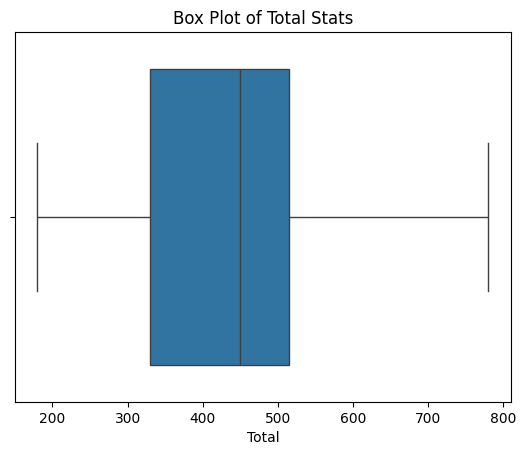

In [13]:
# box and whisker plot of 'Total'
sns.boxplot(data = df, x = 'Total')
plt.title('Box Plot of Total Stats')
plt.show()

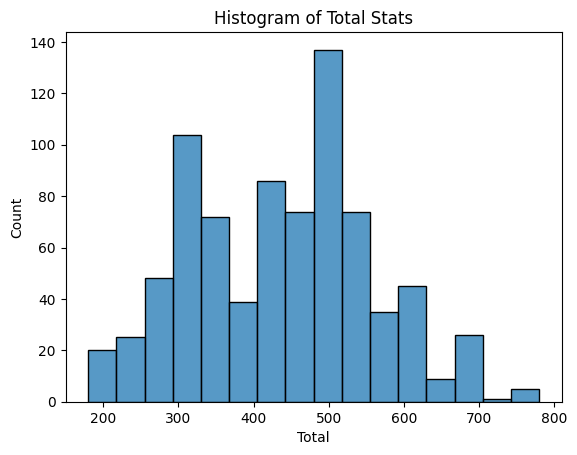

In [14]:
# histogram of 'Total'
sns.histplot(data = df, x = 'Total')
plt.title('Histogram of Total Stats')
plt.show()

The box plot of total stats demonstrates that for the majority of Pokemon, their total stats lie within the interquartile range, roughly between 350 to 550, with a median slightly above 450. This would indicate that the middle 50% of Pokemon have balanced total stats, with no apparent outliers extending beyond the whiskers. The histogram shows a better view of the distribution, being unimodal, as most Pokémon have total stats around 500. The frequency tapers off as stats rise beyond this range, and there are fewer Pokemon that attain extremely high total stats above 600. Also, the left tail of the histogram is longer; hence, it is a bit skewed to the left towards the lower total stats. All in all, it would appear from the distribution that Pokemon have balanced stats: most are roughly in the middle of the stats range and only a small amount is significantly stronger.









#### Initial Visualizations

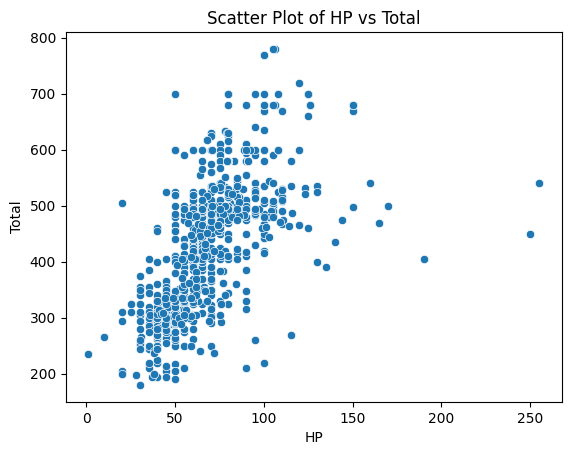

In [15]:
# plot HP (health points) with total stats
sns.scatterplot(data = df, x = 'HP', y = 'Total')
plt.title('Scatter Plot of HP vs Total')
plt.show()

The scatter plot shows a positive relationship between HP and Total Stats, indicating that higher HP contributes to a Pokemon's overall strength. Most Pokemon cluster around moderate HP values (0–100), with a few outliers having exceptionally high HP or total stats. This suggests that while HP is important, other attributes like Attack and Defense also significantly influence a Pokemon's total stats.

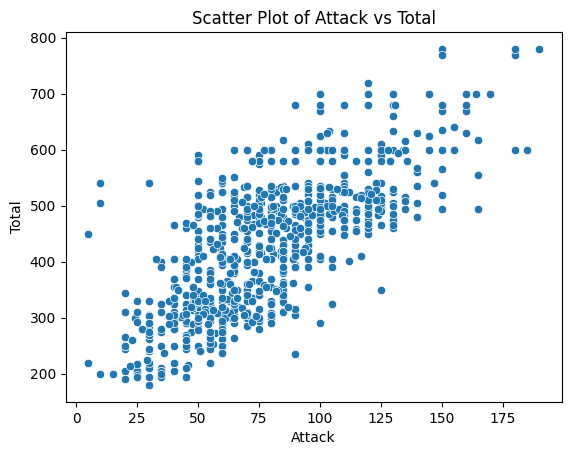

In [16]:
# plot attack with total stats
sns.scatterplot(data = df, x = 'Attack', y = 'Total')
plt.title('Scatter Plot of Attack vs Total')
plt.show()

The scatter plot shows a strong positive relationship between Attack and Total Stats, indicating that higher Attack contributes significantly to a Pokemon's overall strength. Most Pokémon have Attack values clustered between 50 and 100, with a few outliers exhibiting exceptionally high Attack or total stats. This suggests that Attack plays a major role in determining a Pokemon's strength, though other attributes also contribute to total stats.

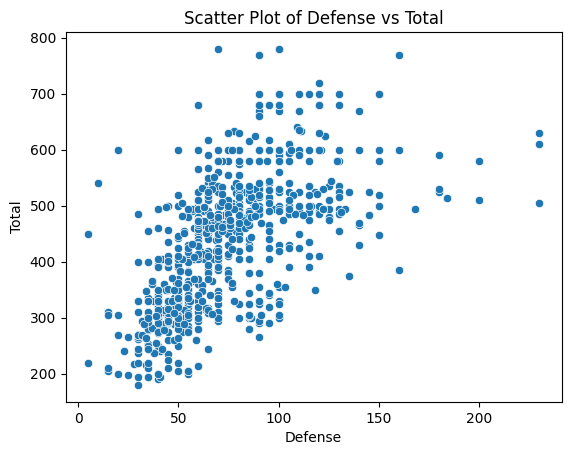

In [17]:
# plot defense with total stats
sns.scatterplot(data = df, x = 'Defense', y = 'Total')
plt.title('Scatter Plot of Defense vs Total')
plt.show()

The scatter plot shows a positive relationship between Defense and Total Stats, indicating that higher Defense contributes to a Pokemon's overall strength. Most Pokemon have Defense values clustered between 50 and 100, with a few outliers having exceptionally high Defense or total stats. This suggests that while Defense is important, other attributes also significantly influence a Pokemon's total stats.

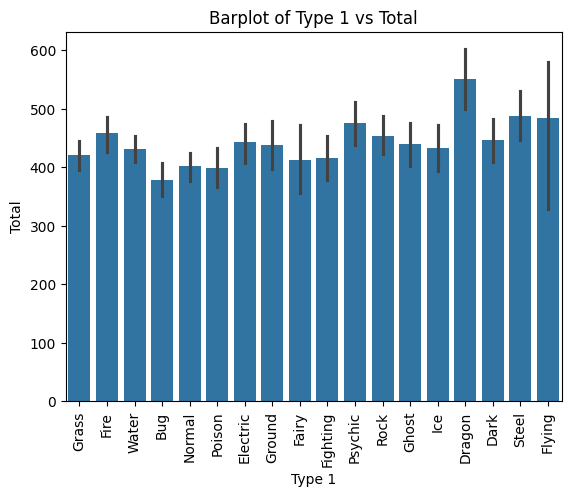

In [18]:
# plot type1 with total stats
sns.barplot(data = df, x = 'Type 1', y = 'Total')
plt.title('Barplot of Type 1 vs Total')
plt.xticks(rotation=90)
plt.show()

The bar plot shows the average total stats for Pokemon by their primary type (Type 1). Pokémon of the Dragon type have the highest average total stats, indicating their overall strength, while types like Bug and Normal have lower average total stats. This suggests that Pokemon types play a significant role in determining their overall power and balance within the games.

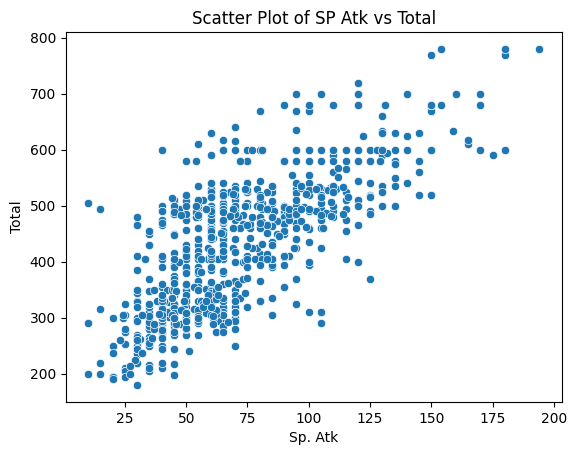

In [19]:
# plot special attack with total stats
sns.scatterplot(data = df, x = 'Sp. Atk', y = 'Total')
plt.title('Scatter Plot of SP Atk vs Total')
plt.show()

The scatter plot shows a positive relationship between Special Attack (Sp. Atk) and Total Stats, indicating that higher Sp. Atk values contribute to a Pokemon's overall strength. Most Pokemon have Sp. Atk values clustered between 50 and 100, with a few outliers exhibiting exceptionally high Sp. Atk or total stats. This suggests that Sp. Atk is a significant factor in determining a Pokemon's total stats, alongside other attributes.

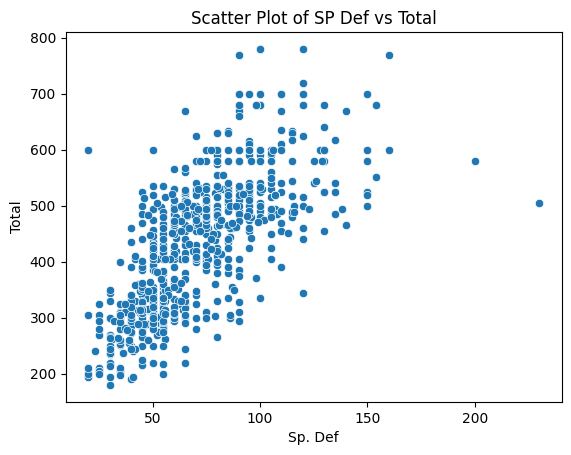

In [20]:
# plot special defense with total stats
sns.scatterplot(data = df, x = 'Sp. Def', y = 'Total')
plt.title('Scatter Plot of SP Def vs Total')
plt.show()

The scatter plot shows a positive relationship between Special Defense (Sp. Def) and Total Stats, indicating that higher Sp. Def values contribute to a Pokemon's overall strength. Most Pokemon have Sp. Def values clustered between 50 and 100, with a few outliers having exceptionally high Sp. Def or total stats. This highlights Sp. Def as an important factor influencing total stats, alongside other attributes.

## Modeling & Interpretations

To predict a Pokemon's strength, I will explore several regression models to determine which ones provides the most accurate estimations and effectively explain the variation in the data. The goal was to assess how well attributes like HP, Attack, Defense, and others contribute to the Pokemon's overall strength. I use 80% of the dataset to train the models and 20% to evaluate their predictive performance.   

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

#### Baseline Model

To get my baseline value, I took the mean squared error (mse) of the Total score, which predicts the mean the target variable for all observations. This provides a benchmark to compare my other models with. Essentially, if a model cannot outperform this baseline, it may mean that the model is not capturing meaningful patterns in the data.

In [22]:
# calculate Total mean squared error (mse)
y = df['Total']
base = np.ones(len(y))*y.mean()
mean_squared_error(y, base)

14373.141993749998

A mse of 14,373.14, means that the models I build should aim to achieve a lower score to be considered an improvement over this baseline.

#### Linear Regression Model

I chose to build a linear regression model because it is used to model the relationship between independent variables and target variables. This will provides insights into which features are most influential in determining 'Total' stats.

In [23]:
# create x and y and split data
X = df[['Type 1', 'Type 2', 'HP', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = df['Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# categorial cols for encoding
cat_cols = ['Type 1', 'Type 2']

# create transformer for categorical cols
transformer = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_cols),
    remainder='passthrough'
)

In [25]:
# create pipeline for linear model
pipe = Pipeline([
    ('encode', transformer),
    ('model', LinearRegression())
])

# Fit the pipeline
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Type 1', 'Type 2'])])),
                ('model', LinearRegression())])

In [26]:
# get feature maps after encoding
feature_names = (
    transformer.named_transformers_['onehotencoder'].get_feature_names_out(cat_cols).tolist() +
    X.select_dtypes(exclude=['object']).columns.tolist()
)

In [27]:
# find coefficients and y-intercept
lr = pipe.named_steps['model']
coefficients = pd.DataFrame(
    lr.coef_,
    index=feature_names,
    columns=['Coefficient']
).sort_values('Coefficient', ascending=False)

print("Model Coefficients:")
print(coefficients)

print("\nIntercept:", lr.intercept_)

Model Coefficients:
                 Coefficient
Type 1_Fighting    22.799551
Type 1_Dragon      21.749541
Type 1_Ground      11.684805
Type 1_Rock        11.236995
Type 2_Dark         9.712743
Type 2_Fighting     9.224219
Type 1_Dark         7.043545
Type 1_Steel        2.794817
Defense             1.419313
Type 1_Fire         1.417423
Speed               1.316830
HP                  1.307713
Sp. Atk             1.203085
Sp. Def             0.754654
Type 1_Normal      -0.954792
Type 1_Ice         -1.538809
Type 1_Fairy       -4.265898
Type 1_Grass       -5.156190
Type 1_Water       -5.177939
Type 2_Steel       -6.371358
Type 2_Grass       -6.443204
Type 1_Poison      -7.135699
Type 1_Ghost       -8.088465
Type 1_Electric    -9.332962
Type 2_Ground     -10.127073
Type 2_Ghost      -11.659127
Type 2_Poison     -11.869083
Type 2_nan        -12.290291
Type 1_Psychic    -12.784089
Type 2_Dragon     -12.822456
Type 1_Flying     -13.117387
Type 2_Ice        -13.649222
Type 2_Flying     -15.9

In [28]:
# Calculate performance metrics
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("\nTraining Metrics:")
print(f"MSE: {mean_squared_error(y_train, y_train_pred):.2f}")
print(f"R2 Score: {r2_score(y_train, y_train_pred):.2f}")

print("\nTesting Metrics:")
print(f"MSE: {mean_squared_error(y_test, y_test_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_test_pred):.2f}")


Training Metrics:
MSE: 462.86
R2 Score: 0.97

Testing Metrics:
MSE: 463.61
R2 Score: 0.97


In [29]:
# Calculate feature importance
r = permutation_importance(pipe, X_test, y_test, n_repeats=10)
importance_df = pd.DataFrame(
    r['importances_mean'],
    index=X.columns,
    columns=['Importance']
).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)


Feature Importance:
         Importance
Sp. Atk    0.290054
Defense    0.255857
Speed      0.213391
HP         0.157725
Sp. Def    0.073172
Type 1     0.011979
Type 2     0.009312


so I fit a linear regression model to predict the Total Stats of a Pokémon given its other characteristics, Type 1, Type 2, HP, Defense, Special Attack, Special Defense, and Speed. This model significantly outperforms the baseline model that predicts the mean Total Stats, mse = 14,373. The model achieved an R² score of 0.97 on the training and test sets. This means that the model has explained 97% of variance in Total Stats. Besides, the Mean Squared Error was consistent between the training set, 462.86, and the test set at 463.61-this suggests that the model does generalize well and is also not overfitting.


The strong performance indicates that numerical features such as Special Attack, Defense, and Speed are of most importance, as identified through permutation importance as the top predictors. And though categorical features, which are Type 1 and Type 2, contribute little in this model, they did help with minor insights. From the R² value of 0.97, the model captures most relationships between a Pokémon's stats with the Total Stats. Further refinements may be done by exploring more complex models or interactions that confirm the robustness of these findings.

#### K-NN Regression Model

For my second model, I chose to use a k-Nearest Neightbors (k-NN) regression model because it is non-parametric, instance-based algorithm that makes predictions based on similarity between data points. Unlike linear regression, KNN does not assume a specific relationship between the features and the target variable.By considering the average of the target values of the closest neighbors, k-NN can effectively leverage local relationships in the Pokémon dataset. This flexibility allows k-NN to account for variations in stats and types that may influence Total Stats without imposing a rigid structure on the data.

In [30]:
# create x and y and split data
X = df[['Type 1', 'Type 2', 'HP', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = df['Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


In [31]:
# # categorial cols for encoding
cat_cols = ['Type 1', 'Type 2']

# create transformer for categorical cols
transformer = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_cols),
    (StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
    remainder='passthrough'
)

In [32]:
# create pipline
pipe = Pipeline([
    ('encode', transformer),
    ('model', KNeighborsRegressor())
])

# define grid of hyperparams
param_grid = {
    'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]
}


In [33]:
# perform gridsearch with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categ

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Type '
                                                                          '1',
                                                                          'Type '
                                                                          '2']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['HP', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], dtype='object'))])),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]},
             scoring='neg_mean_squared_error')

In [34]:
# get best parameter
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'model__n_neighbors': 15}


In [35]:
# use 25 neighbors in model
knn = grid_search.best_estimator_

In [36]:
# get predictions
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

print("\nTraining Metrics:")
print(f"MSE: {mean_squared_error(y_train, y_train_pred):.2f}")
print(f"R2 Score: {r2_score(y_train, y_train_pred):.2f}")

print("\nTesting Metrics:")
print(f"MSE: {mean_squared_error(y_test, y_test_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_test_pred):.2f}")


Training Metrics:
MSE: 973.00
R2 Score: 0.93

Testing Metrics:
MSE: 1134.22
R2 Score: 0.93


This knn model performed well on both the training and testing datasets, achieveing an R^2 score of 0.93, which indicates that the model explains 93% of the variance in Total stats. However, we see a higher mse score on the test data which could mean the model's performance decreases on unseen data, indicateding overfitting.

In [37]:
# combine encoded cat and num features
# feature_names = (pipe.named_steps['encode'].get_feature_names_out().tolist())

# calculate feature importance
r = permutation_importance(knn, X_test, y_test, n_repeats=10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
Type 1,-0.000128
Type 2,0.003475
HP,0.152342
Defense,0.162741
Sp. Atk,0.182287
Sp. Def,0.112558
Speed,0.152602


Type1 and Type2 has very little importance. The features that are most important are Sp. Atk, Defense, and Speed.   

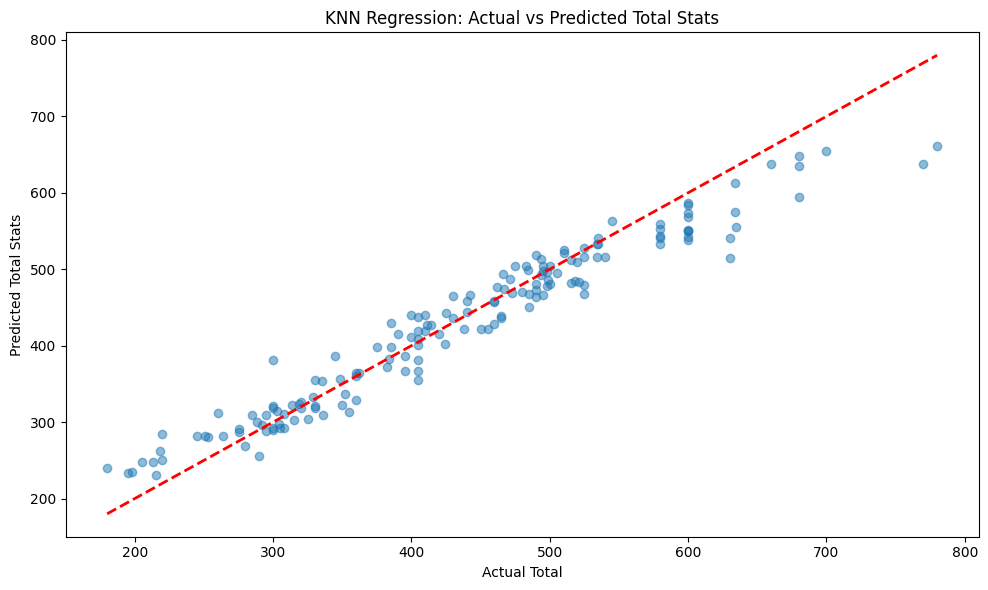

In [38]:
# plot actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Total')
plt.ylabel('Predicted Total Stats')
plt.title('KNN Regression: Actual vs Predicted Total Stats')
plt.tight_layout()
plt.show()

This scatter plot compares the actual Total stats of Pokemon to the predicted Total stats from the knn regression model. The red dashed line represent the ideal senario wehre predictions align with actualy values. Most predictions are close to the actual values, especially in the mid-range (300-600), showing the model's auccracy for common Pokemon stats. There are some deviations at a higher Total stats (Above 600), where predictions slightly underestimate or overestimate the actual values. Overall, the knn model provides strong predictions, with most data points clustering near the red line. This model effectively captures the relationship between the input features and Total stats, though there is some minor error for Pokemons with extreme values.

In [39]:
print(grid_search.cv_results_['params'][0])

{'model__n_neighbors': 5}


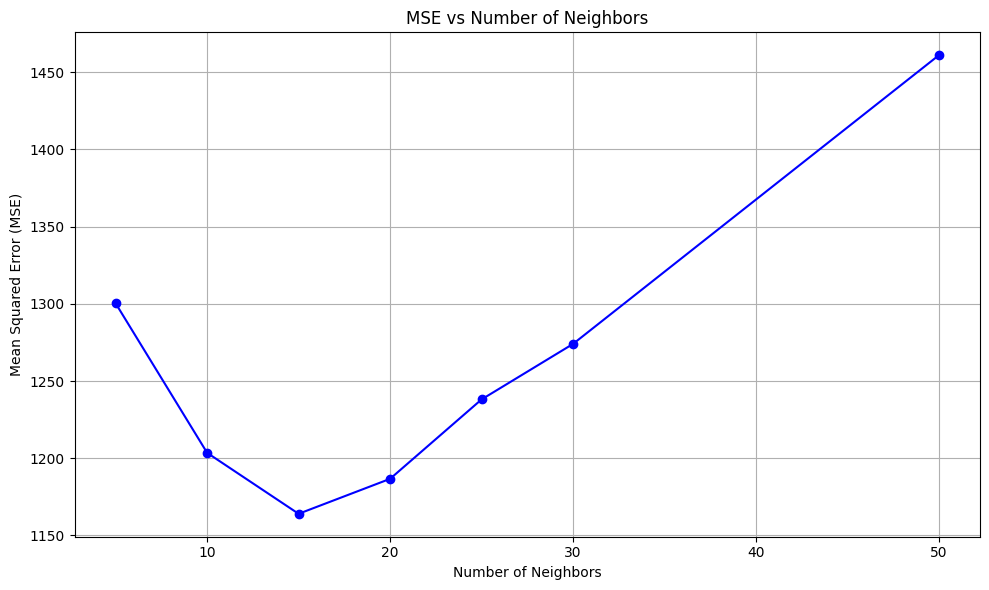

In [40]:
#get n_estimators values
n_estimators = [param['model__n_neighbors'] for param in grid_search.cv_results_['params']]

#mse scores
mse_scores = -grid_search.cv_results_['mean_test_score']

# plot MSE vs Number of Estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, mse_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Number of Neighbors')
plt.grid(True)
plt.tight_layout()
plt.show()

This graph represents the relationship between the Mean Squared Error and the number of estimators for different values of max_depth, each line representing a configuration. As the number of estimators increases, the MSE has minor variations but eventually stabilizes, which means that adding more estimators improves performance up to a point. For some configurations, the lowest MSE is around 100–200 estimators, which seems to be a sweet spot in terms of model accuracy versus computational efficiency. Beyond this range, improvements are very small, thus providing diminishing returns.

Furthermore, the separation between many lines shows the influence of max_depth. Some settings clearly exhibit far lower MSE than others, which indicates that the performance improvement of the model cannot do without tuning the hyperparameters with n_estimators. All in all, the graph shows the best MSE performance when carefully choosing from a range of 100–150 estimators by further tuning max_depth.
like

#### Overal Random Forest Analysis
The Random Forest Regression model delivered strong performance, though it did not outperform the Linear Regression model, which achieved the highest accuracy and lowest error metrics. The Random Forest achieved an R² score of 0.99 on the training data and 0.93 on the testing data, highlighting its ability to fit the training data effectively while maintaining good generalization to unseen data. The slight gap between training and testing performance suggests that some overfitting occurred, but the model still performed better than both the KNN Regression and Decision Tree Regression models. The Random Forest’s success can be attributed to its ensemble nature, which effectively reduces variance and captures complex, non-linear relationships within the data. Grid search hyperparameter tuning further optimized the depth of the trees and the number of estimators, enhancing overall model accuracy.

Feature importance analysis revealed that Special Attack, Defense, and Speed were the most significant predictors of Total Stats. These findings highlight the importance of numerical attributes in determining a Pokémon's overall strength. In contrast, categorical features such as Type 1 and Type 2 had minimal influence, indicating that numerical stats play a more dominant role in predicting Total Stats. While the Random Forest model captured the relationships well, its slight overfitting and higher complexity compared to Linear Regression make it a less optimal choice for this dataset.

#### Decision Tree Regression Model

I decided to use a decision tree regression model because

In [41]:
#create X & y and split data
X = df[['Type 1', 'Type 2', 'HP', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = df['Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [65]:
#encode categorical columns
cat_cols = ['Type 1', 'Type 2']
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder = make_column_transformer(
    (ohe, cat_cols),
    verbose_feature_names_out=False,
    remainder='passthrough'
)

In [66]:
#transform the data
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [75]:
#creating base model
dtree = DecisionTreeRegressor(random_state=42)

#parameter grid
param_grid = {
    'max_depth': range(1, 21)
}

#GridSearchCV
grid_search = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    return_train_score=True
)

# fit GridSearchCV
grid_search.fit(X_train_encoded, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 21)}, return_train_score=True,
             scoring='neg_mean_squared_error')

Optimal depth from cross-validation: 11


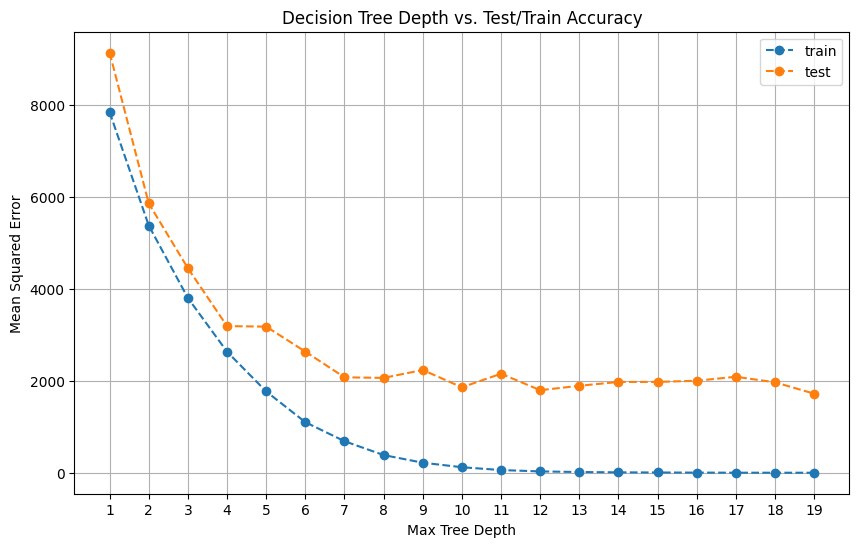

In [77]:
# Get optimal depth
optimal_depth = grid_search.best_params_['max_depth']
print(f"Optimal depth from cross-validation: {optimal_depth}")
dtree.fit(X_train_encoded, y_train)

# Find optimal max depth
train_scores = []
test_scores = []
for d in range(1, 20):
    dtree = DecisionTreeRegressor(max_depth=d).fit(X_train_encoded, y_train)
    y_train_preds = dtree.predict(X_train_encoded)
    y_test_preds = dtree.predict(X_test_encoded)
    train_scores.append(mean_squared_error(y_train, y_train_preds))
    test_scores.append(mean_squared_error(y_test, y_test_preds))

# plot depth vs MSE
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), train_scores, '--o', label='train')
plt.plot(range(1, 20), test_scores, '--o', label='test')
plt.grid()
plt.legend()
plt.xticks(range(1, 20))
plt.xlabel('Max Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('Decision Tree Depth vs. Test/Train Accuracy')
plt.show()


The graph shows a classic pattern of the bias-variance tradeoff in decision trees. At depth 1, both training and test errors are very high (around 8000 MSE), indicating underfitting. As the tree depth increases, there is a sharp decrease in both training and test errors up to about depth 7-8, after which the improvement becomes minimal. Whereas the training error (blue) further decreases, reaching close to zero at higher depths, the test error (orange) stays rather constant from a depth of 8-11 at about 2000 MSE. Cross-validation selected the optimal depth of 11, which seems reasonable because it falls into that region where the test error flattened out and before the gap between training and test error becomes too large. Indeed, from depth 11 and on, there are some indications of overfitting when the training error keeps going down, whereas the test error does not show improvements or even increases. We believe that depth 11 represents a good compromise in the model complexity vs generalization performance.

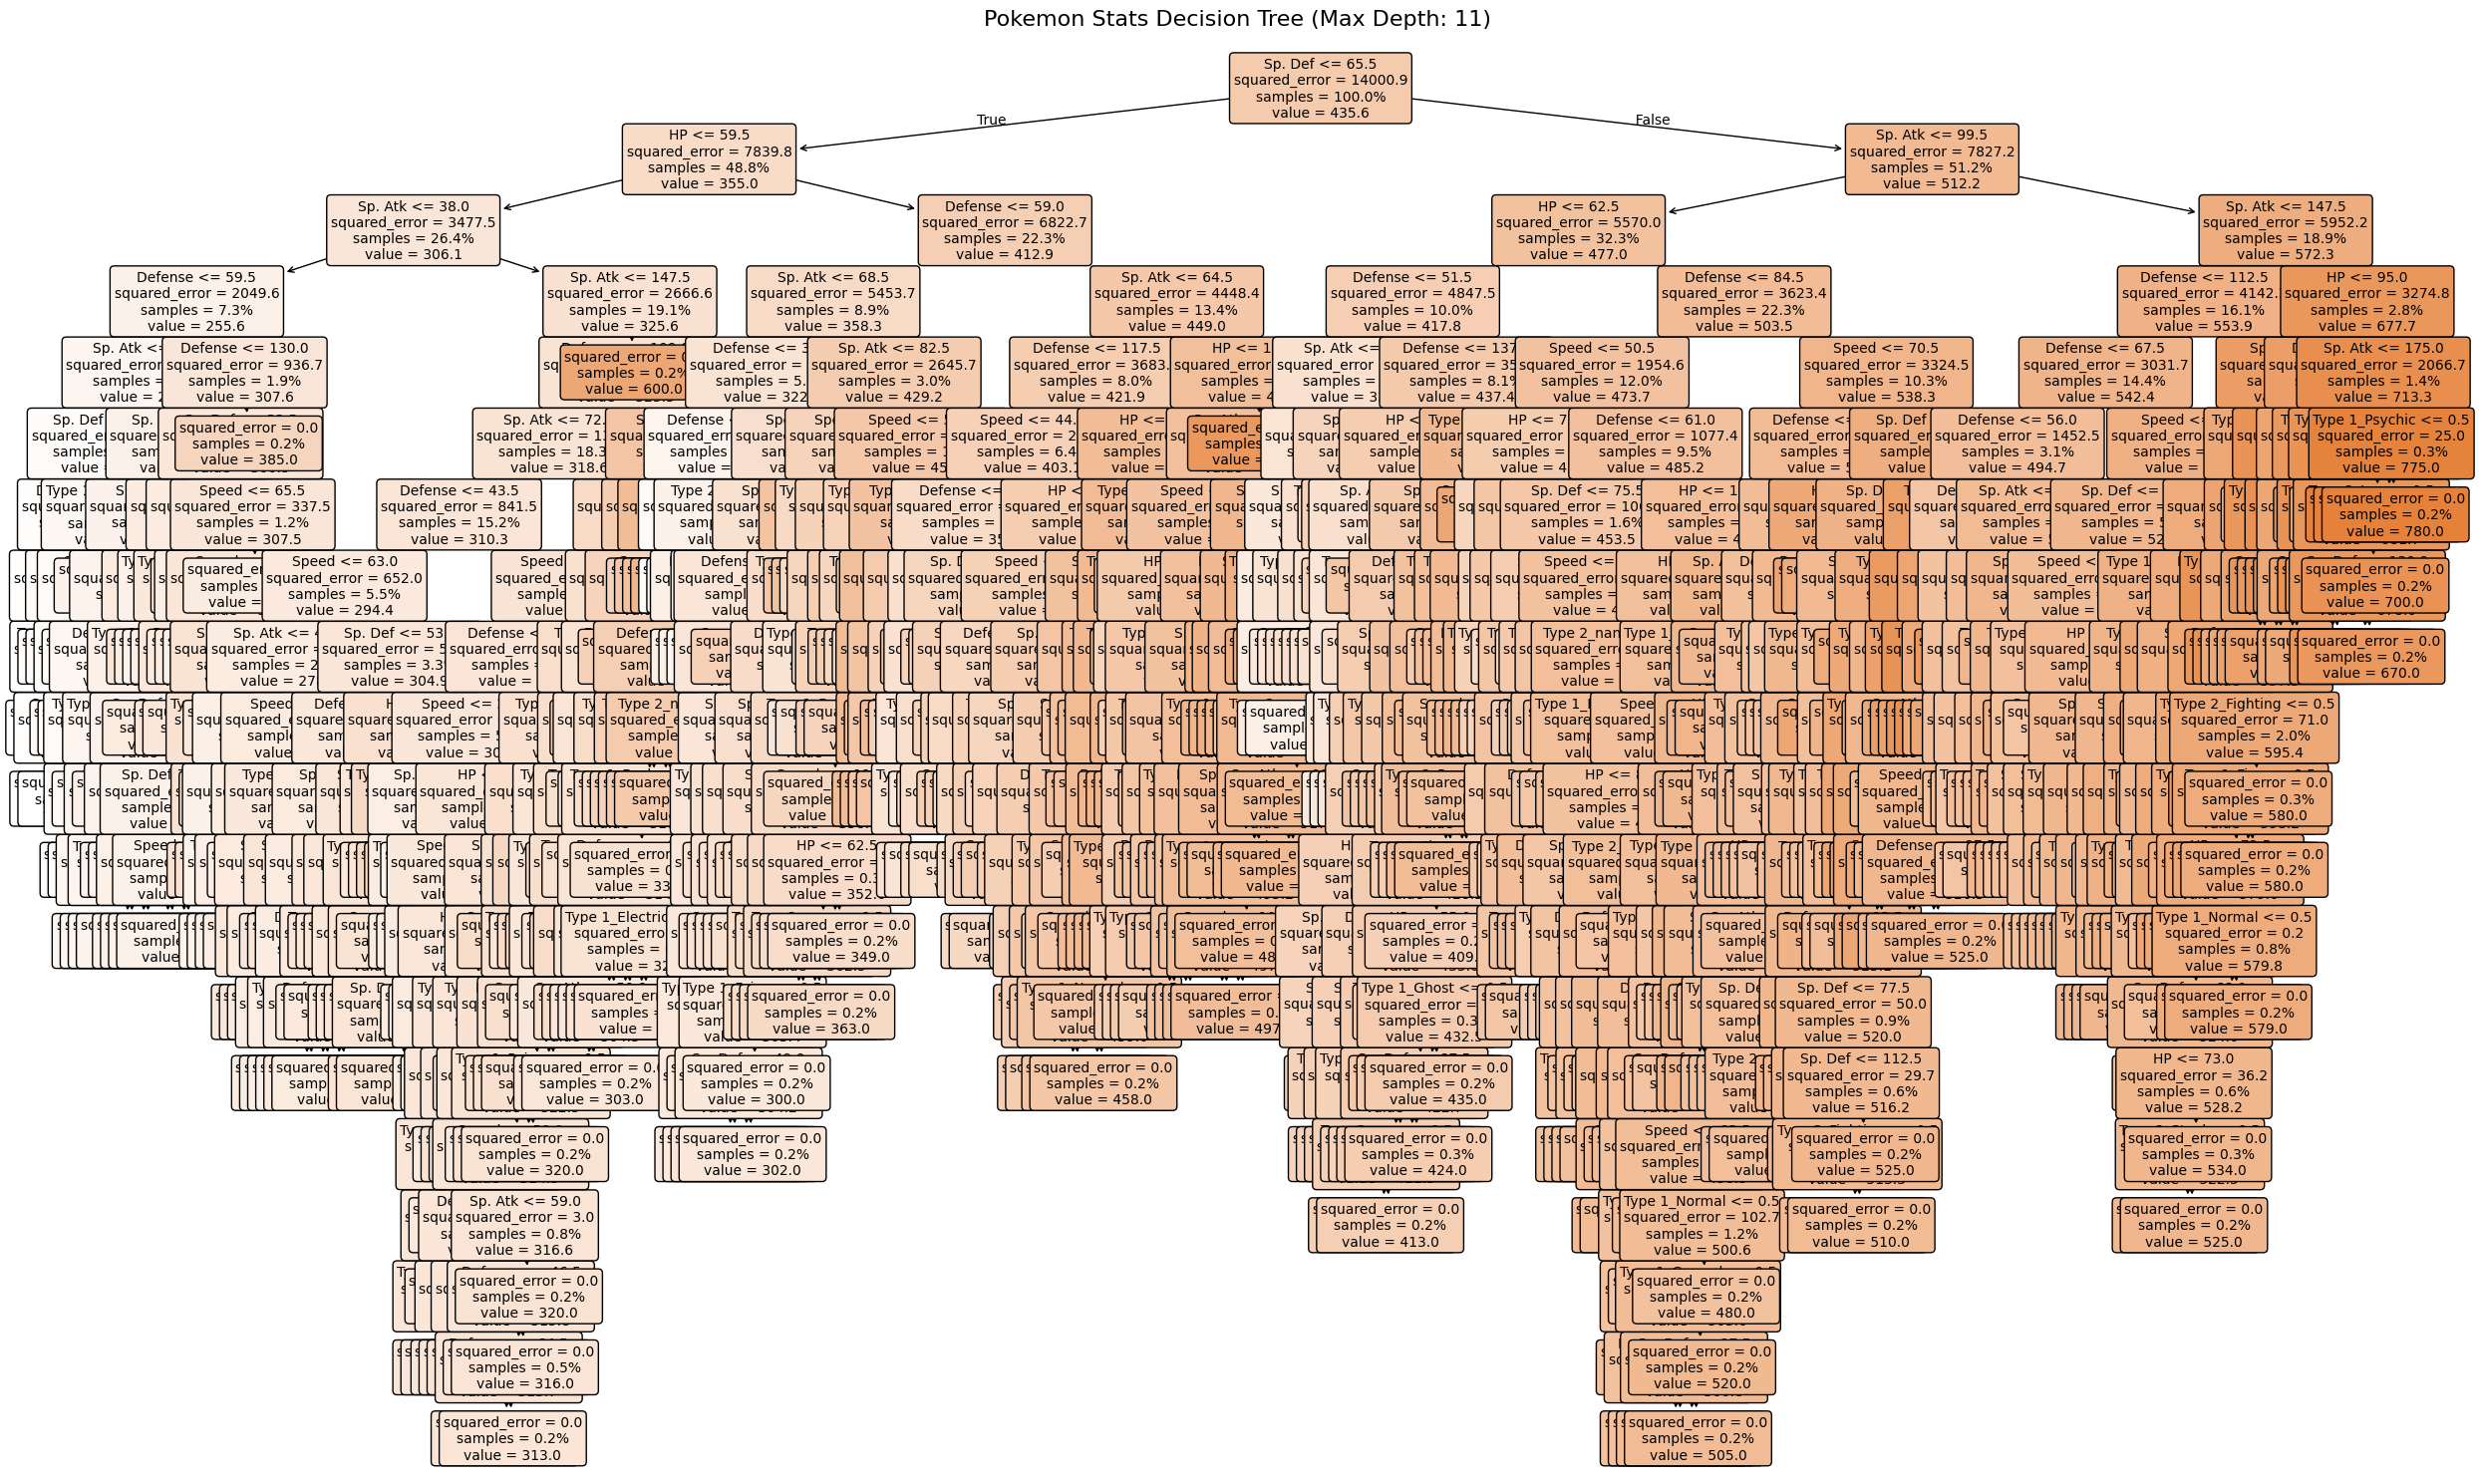

In [78]:
# Get the feature names from encoder
feature_names = encoder.get_feature_names_out().tolist()

# Create figure with white background
plt.figure(figsize=(25, 15), facecolor='white')

# Plot the decision tree
plot_tree(
    dtree,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    fontsize=10,
    proportion=True,
    precision=1,
    impurity=True
)

# Add title with tree information
plt.title(f"Pokemon Stats Decision Tree (Max Depth: {optimal_depth})", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

Looking at this Pokemon Stats Decision Tree with a maximum depth of 11, we can see how it predicts a Pokemon's total stats based on various attributes. The tree's primary split begins with Special Attack (Sp. Atk <= 38.0), indicating that Special Attack is the most important initial predictor of a Pokemon's total stats, which makes sense as it's a key offensive stat that often correlates with overall power level. Pokemon with lower Special Attack (left side of the tree) tend to have secondary splits focusing on Defense and Speed, resulting in lower total stats around 255-306, suggesting these are likely defensive or utility Pokemon. In contrast, Pokemon with higher Special Attack (right side) branch into further splits based on Special Defense and HP, containing paths leading to the highest total stat values of 500-700, indicating these are typically more powerful Pokemon with well-rounded stats. Several important thresholds emerge throughout the tree: a primary Special Attack threshold of 38.0, HP threshold of 59.5 for higher-stat Pokemon, Defense thresholds around 59.0 and 84.5, and a Speed threshold of 126.5 as an important secondary split. The color gradient from lighter to darker orange indicates increasing predicted total stat values, with the darkest nodes representing Pokemon with the highest total stats. The tree's intricate lower levels suggest it's capturing nuanced relationships between stats, reflecting how Pokemon stats are typically distributed in the game.

In [79]:
y_train_preds = dtree.predict(X_train_encoded)
y_test_preds = dtree.predict(X_test_encoded)

train_mse = mean_squared_error(y_train, y_train_preds)
train_r2 = r2_score(y_train, y_train_preds)
test_mse = mean_squared_error(y_test, y_test_preds)
test_r2 = r2_score(y_test, y_test_preds)

print("\nTraining Metrics:")
print(f"MSE: {train_mse:.2f}")
print(f"R2 Score: {train_r2:.2f}")

print("\nTesting Metrics:")
print(f"MSE: {test_mse:.2f}")
print(f"R2 Score: {test_r2:.2f}")


Training Metrics:
MSE: 0.00
R2 Score: 1.00

Testing Metrics:
MSE: 1717.36
R2 Score: 0.89


For the training data, an MSE of 0.00 and an R^2 score of 1.00 could mean that the decision tree has perfectly fitted the training data. This behavior is normal for deep decision tress, which have a tendency to memorize the training data by modeling all the pattersn, including noise. Though this means perfect accuracy on the training set, this leads to a lack of generalization.

For the testing data, an R^2 score of 0.89 demonstrates that the model performs well, explaining 89% of the variance in the test set. However, an MSE of 1717.36 suggests that the predictions on the unseen data are less precise compared to the training set. This gap between the training and testing performance highlights overfitting, where the model is too closely tailored to the training data and struggles to generalize to new observations.

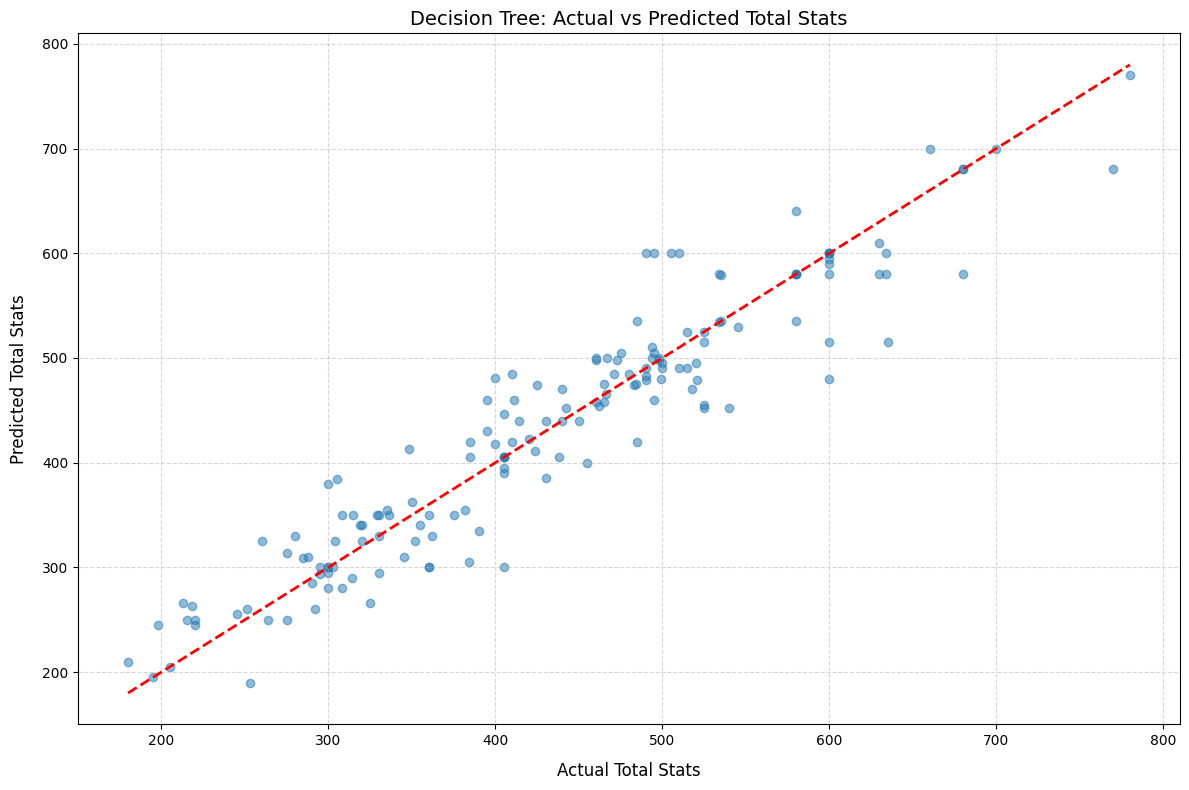

In [83]:
# plot actual vs predicted values
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_test_preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Total Stats', fontsize = 12, labelpad = 10)
plt.ylabel('Predicted Total Stats', fontsize = 12, labelpad = 10)
plt.title('Decision Tree: Actual vs Predicted Total Stats', fontsize = 14)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

The scatter plot illustrates the relationship between the actual and predicted Total Stats for the Decision Tree regression model, with the red dashed line representing the ideal scenario where predictions perfectly match actual values. Most data points align closely with this line, indicating that the model effectively captures the overall trend and demonstrates a strong positive correlation between the actual and predicted values.

However, some deviations are noticeable, particularly where predictions fall significantly above or below the ideal line. These discrepancies, more prominent in the higher range of Total Stats, suggest that the model struggles slightly with larger values, leading to errors. This behavior could be a result of the model overfitting to the training data or failing to generalize effectively for more extreme values.

In summary, while the Decision Tree regression model performs well and captures the general pattern in the data, the presence of deviations highlights opportunities for improvement. Fine-tuning hyperparameters, such as limiting tree depth, or employing ensemble methods like Random Forests may help reduce prediction errors and enhance the model's accuracy.

In [84]:
#determine feature importance
r = permutation_importance(dtree, X_test_encoded, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = encoder.get_feature_names_out().tolist())

,0
Type 1_Bug,0.001279
Type 1_Dark,0.000937
Type 1_Dragon,-0.000150
Type 1_Electric,0.002325
Type 1_Fairy,0.000000
Type 1_Fighting,0.000297
Type 1_Fire,-0.000392
Type 1_Flying,0.000000
Type 1_Ghost,0.000000
Type 1_Grass,0.000219


The feature importance analysis shows that numeric features are much more important in predicting the Total Stats of a Pokémon compared to the categorical features of "Type." Among all predictors, the most influential feature is Defense, with an importance value of 0.265940, closely followed by Special Attack, at 0.238748. Other notable contributors include HP, 0.164383; Special Defense, 0.139793; and Speed, 0.115922. These core numeric statistics, representing direct measures of a Pokémon's attack, defense, and overall, serve as strong contributors to the model's predictions.

By contrast, categorical features for Type 1 and Type 2 both show very low to no importance. Many of these features, such as Type 1_Fairy, Type 1_Flying, and Type 2_Bug, are zero in importance, indicating that they have not contributed to the model. Interestingly, some feature types even have slight negative importance: Type 1_Water feature (-0.003690), Type 2_nan (-0.003028), which introduces some noise and may reduce predictive accuracy of the model. This discrepancy identifies the limited role Pokémon type attributes play in determining Total Stats.

Overall, the analysis underlines that base stats-attacking, defensive, and HP-related values-are way more relevant predictors of Total Stats than type-based attributes. In the future, it may be more effective to focus on these numeric features while simplifying or removing less impactful categorical variables to potentially improve the efficiency of the model without a loss in performance.

#### Overall Decision Tree Regression Analysis

The Decision Tree Regression model demonstrated mediocre performance compared to the Random Forest and Linear Regression models. Although it achieved a perfect R^2 value of 1.00 with an MSE of 0.00 on the training dataset, this indicates a serious problem: the model has memorized the data, leading to overfitting. On the test dataset, its performance dropped significantly, with an R^2 score of 0.89 and a much higher MSE of 1717.36. This stark difference between the training and testing results highlights the Decision Tree's sensitivity to overfitting, particularly when its depth is not constrained.

In contrast, the Random Forest Regression model achieved an R^2 score of 0.93 on the test data, showing its ability to generalize more effectively. The single-tree nature of the Decision Tree limits its capability to reduce variance and capture complex relationships, whereas the Random Forest's ensemble structure, which combines multiple decision trees, mitigates overfitting and improves generalization. Similarly, Linear Regression outperformed the Decision Tree by achieving the highest accuracy and lowest error metrics due to its simplicity in modeling the linear trends in the data.

The feature importance analysis further supports these findings. Numeric attributes such as Defense, Special Attack, and HP were identified as the most significant predictors of Total Stats, aligning with the results from the other models. In contrast, categorical "Type" features contributed minimally, reinforcing that numerical stats dominate the prediction of Total Stats.

While the Decision Tree offers interpretability with its singular-tree structure, its tendency to overfit makes it less suitable for this dataset compared to Random Forest and Linear Regression. To improve its performance, constraining the tree depth and applying further hyperparameter tuning could help reduce overfitting and enhance its ability to generalize to unseen data.








#### Random Forest Regression Model

For my last model, I wanted to test a Random Forest Regression model because it combines the strengths of mutiple decision trees to produce more accurate and stable predictions. Random forests are effective for capturing non-linear relatinoships in the data. Additionally, the provide robust feature importance scores, which offer insights into the attributes that greatly influence predictions.

In [85]:
# create X & y and split data
X = df[['Type 1', 'Type 2', 'HP', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = df['Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [87]:
# create transformer for categorical columns
cat_cols = ['Type 1', 'Type 2']
transformer = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_cols),
    remainder='passthrough'
)

In [88]:
# create pipeline
pipe = Pipeline([
    ('encode', transformer),
    ('model', RandomForestRegressor(random_state=42))
])

In [89]:
# grid of hyperparameters
param_grid = {
    'model__n_estimators': [50, 100, 150, 200],
    'model__max_depth': [3, 4, 5, 6, 10]
}

In [90]:
# perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categ

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Type '
                                                                          '1',
                                                                          'Type '
                                                                          '2'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [3, 4, 5, 6, 10],
                         'model__n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [91]:
# best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'model__max_depth': 10, 'model__n_estimators': 50}


In [92]:
# best model
forest = grid_search.best_estimator_

In [93]:
# calculate performance metrics
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print("\nTraining Metrics:")
print(f"MSE: {mean_squared_error(y_train, y_train_preds):.2f}")
print(f"R2 Score: {r2_score(y_train, y_train_preds):.2f}")

print("\nTesting Metrics:")
print(f"MSE: {mean_squared_error(y_test, y_test_preds):.2f}")
print(f"R2 Score: {r2_score(y_test, y_test_preds):.2f}")


Training Metrics:
MSE: 204.83
R2 Score: 0.99

Testing Metrics:
MSE: 1041.61
R2 Score: 0.93


On the training data, the model achieved as mse of 204.83 and an R^2 of 0.99, which suggests that the model effectifely captures the reltaionships within the training set.
On the testing data, the model achieved and mse of 1041.61 and an R^2 of 0.93, reflecting excellent generalization to unsees data with 93% of the variance in the Total stats explained.

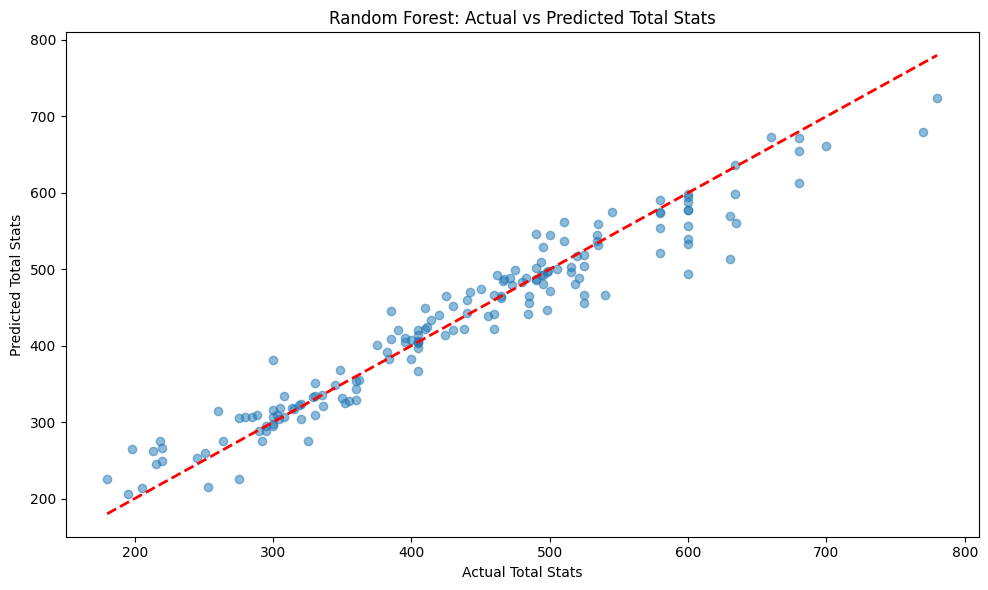

In [94]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Total Stats')
plt.ylabel('Predicted Total Stats')
plt.title('Random Forest: Actual vs Predicted Total Stats')
plt.tight_layout()
plt.show()

This scatter plot compares the actual Total Stats to the prediction of the Total Stats based on the Random Forest Regression model. The red dashed line represents what would have been perfect predictions that exactly equate to the actual, and the blue points represent individual predictions. Most are very close to the red line, representing the strength in the predictive capability of the model. The consistent spread of predictions across the range of Total Stats suggests that the model performs well without noticeable bias at lower or higher values. While there are minor deviations where some predictions slightly overestimate or underestimate the actual values, these are minimal. Overall, the plot visually supports the model's high R² score of 0.93, showcasing that the Random Forest model will do a great job in making reliable and pretty accurate predictions of the Total Stats.

In [95]:
# determine feature importance
r = permutation_importance(forest, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
Type 1,-0.000673
Type 2,-0.000496
HP,0.163760
Defense,0.166028
Sp. Atk,0.153999
Sp. Def,0.143933
Speed,0.106502


The feature importance from the Random Forest Regression model highlights the key attributes that contributed to the prediction of the Total Stats of Pokémon. Amongst the features, the importance of Defense was the highest at 0.166, closely followed by HP at 0.163 and Special Attack (Sp. Atk) with a value of 0.154. These three features have the most significant role in determining the Total Stats, since core numerical attributes are very important in deciding the strength of a Pokémon.

Other significant contributors include Sp. Def with 0.144 and Speed with 0.107, which are less impactful but still with meaningful predictive power. The categorical features of Type 1 and Type 2 had very low, if not slightly negative, importance scores of -0.0007 and -0.0005, respectively. This tells that type information contributed minimally, if at all, to the model's predictions.

This confirms that attacking, defensive, and HP-related numerical attributes are the most determining factors in Total Stats, while categorical type variables contribute very little to the overall prediction. The Random Forest model effectively uses these numeric features to capture the patterns in the data, reinforcing the dominance of base stats in determining a Pokémon's Total Stats.

<Figure size 1000x600 with 0 Axes>

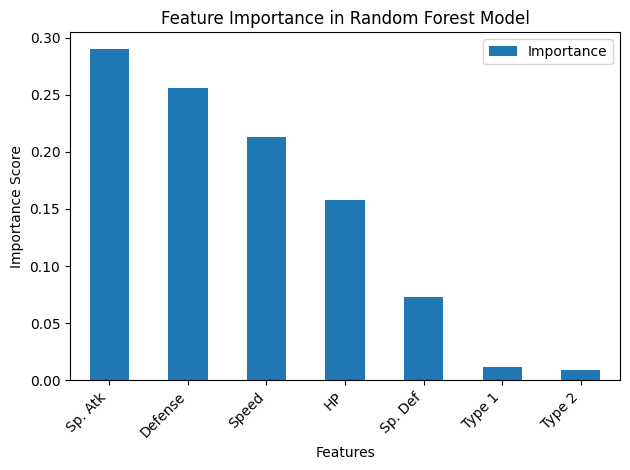

In [96]:
# visualize feature importance
plt.figure(figsize=(10, 6))
importance_df.plot(kind='bar')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The graph illustrates the feature importance scores for the Random Forest Regression model, highlighting the contributions of various attributes in predicting the Total Stats of Pokémon. Among the features, Special Attack (Sp. Atk) is the most influential, with the highest importance score of approximately 0.29, followed closely by Defense at 0.26. These two features play a dominant role in the model's predictions. Speed and HP also contribute significantly, with scores of about 0.21 and 0.16, respectively, indicating their substantial impact on determining Total Stats. In contrast, Special Defense (Sp. Def) has a smaller yet notable contribution, with an importance score of approximately 0.07.

The categorical features, Type 1 and Type 2, exhibit minimal importance, with scores close to 0.01, confirming their negligible role in the model's predictions. This analysis underscores that numeric attributes, particularly attacking, defensive, and speed-related stats, are the primary drivers of Total Stats, while type-based categorical features have little to no predictive power in the Random Forest model.

#### Overall Random Forest Analsis

The Random Forest Regression model delivered outstanding performance, establishing itself as a robust and accurate solution. It effectively captured complex, non-linear relationships in the data while minimizing overfitting through its ensemble learning approach. It achieved a Mean Squared Error (MSE) of 204.83 and an R^2 score of 0.99 on the training data. On the test set, it maintained strong generalizability with an MSE of 1041.61 and an R^2 score of 0.93, demonstrating its ability to balance accuracy and overfitting prevention.

Feature importance analysis further underscored the Random Forest model's ability to identify the key drivers of Total Stats. Special Attack (Sp. Atk) emerged as the most influential feature, contributing 0.29 to the predictions, followed closely by Defense (0.27), Speed (0.21), and HP (0.15). In contrast, Special Defense (Sp. Def) contributed less at 0.07, while categorical variables such as Type 1 and Type 2 offered negligible predictive power, scoring close to 0.01. This emphasizes the dominance of numeric attributes, particularly offensive and defensive statistics, in determining a Pokémon's overall strength, with type attributes contributing minimally in this context.

Overall, the Random Forest Regression model stood out as a reliable and good model for predicting Total Stats. Its ability to generalize well on unseen data, combined with its ensemble approach to capturing both linear and non-linear patterns, made it superior to other models. This performance highlights the Random Forest's capacity to deliver accurate and stable predictions while leveraging the full complexity of the dataset.

## Next Steps & Discussion

### Summary of Findings

After implementing and evaluating four regression models—Linear Regression, K-Nearest Neighbors (KNN) Regression, Decision Tree Regression, and Random Forest Regression—each model demonstrated varying levels of predictive accuracy. While all models performed better than the baseline (mean Total Stats), Linear Regression emerged as the strongest model, achieving the lowest error and highest accuracy, showcasing its ability to generalize exceptionally well to unseen data.

The Linear Regression model emerged as the best performer, achieving a testing MSE of 463.61 and an R^2 score of 0.97. Its simplicity and ability to capture linear relationships within the data made it the most reliable and accurate model. In comparison, the Random Forest Regression model achieved a testing MSE of 1041.61 and an R^2 score of 0.93. While Random Forest effectively captured complex, non-linear relationships and reduced overfitting through its ensemble method, it could not outperform Linear Regression in terms of error metrics.

The KNN Regression model also performed well, achieving a testing R^2 score of 0.93 but with a slightly higher MSE. This result highlights KNN's sensitivity to feature dimensionality and the choice of hyperparameters. Finally, the Decision Tree Regression model struggled with overfitting, perfectly fitting the training data with an R^2 score of 1.00 but dropping to 0.89 on the test set. Its significantly higher MSE of 1717.36 indicated poor generalization to unseen data.

Feature importance analysis revealed that numeric attributes were the primary drivers of a Pokémon's Total Stats. In the Random Forest model, Special Attack (Sp. Atk) contributed the most, with an importance score of 29%, followed by Defense at 27%, Speed at 21%, and HP at 15%. Conversely, the categorical features Type 1 and Type 2 contributed negligibly, further emphasizing that offensive and defensive numerical stats are the key predictors of Total Stats.

Among all models, Linear Regression demonstrated the best generalizability, achieving the lowest error and highest R^2 score on the test data. While Random Forest excelled at capturing complex patterns, its performance did not surpass the accuracy and efficiency of Linear Regression. This analysis highlights the effectiveness of Linear Regression in modeling the dataset while balancing simplicity, accuracy, and predictive performance.

### Next Steps and Possible Improvements

While the Linear Regression model outperformed all other approaches, there are several potential improvements to consider for future iterations to enhance the predictive performance of the models:

1. Hyperparameter Tuning: While the models performed well here, a more exhaustive grid search or the use of RandomizedSearchCV might fine-tune important parameters for models such as Random Forest or KNN Regression. For example, the number of estimators, maximum depth, or minimum samples split for Random Forest could be changed to improve the accuracy and computational efficiency of this model. Similarly, tuning the number of neighbors and distance metrics for KNN might reduce its sensitivity to hyperparameters.

2. Exploring Advanced Ensemble Methods: Advanced techniques, such as Gradient Boosting, XGBoost, or LightGBM, can be explored. Many of these models outperform Random Forest since they iteratively minimize errors and handle complex data structures, especially in the case of slight imbalance or skewed distributions. Their capability for fine-tuning learning rates and optimizing loss functions makes them suitable candidates to improve predictive accuracy.

3. Feature Engineering: Additional features could be introduced to improve predictive accuracy, such as interactions between features or polynomial transformations. For example, combining HP and Defense might reveal deeper relationships relevant to Total Stats.

4. Stratified Train-Test Splits: Given that the dataset may exhibit skewness or imbalanced distributions, using a stratified split approach would ensure that the training and testing sets maintain a similar distribution of Total Stats.

5. Incorporating Additional Data: Inlcuding external featues, such as Pokemons abilities, evolutions, or battle win rates, could provide context for predictions. These factors may offer insights into Pokemon performance that are not fully captured by base stats alone.

With more time and resources, the predictive power and robustness of the models could be significantly improved. Exploring advanced ensemble techniques and enhancing feature engineering strategies would likely reveal deeper patterns within the data, ultimately resulting in more precise and insightful predictions of Total Stats.